In [4]:
# 1. Instalar y descargar archivos SVHN
!wget -nc http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget -nc http://ufldl.stanford.edu/housenumbers/test_32x32.mat


--2025-04-11 19:52:16--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  4.45MB/s    in 47s     

2025-04-11 19:53:03 (3.72 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2025-04-11 19:53:03--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  5.70MB/s    in 18s     

2025-04-11 19:53:21 (3.43 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [5]:
# 2. Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from scipy.io import loadmat


In [6]:
# 3. Cargar los datos .mat ya descargados
def load_svhn(path):
    data = loadmat(path)
    images = np.transpose(data['X'], (3, 0, 1, 2))  # (num_samples, height, width, channels)
    labels = data['y'].flatten()
    labels[labels == 10] = 0  # En SVHN, el dígito '0' está etiquetado como 10
    return images, labels

train_images, train_labels = load_svhn('train_32x32.mat')
test_images, test_labels = load_svhn('test_32x32.mat')


In [7]:
# 4. Preprocesamiento
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)


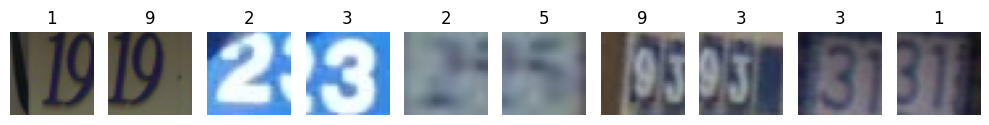

In [8]:
# 5. Visualización rápida
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
# 6. Modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 7. Entrenamiento
history = model.fit(train_images, train_labels_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.3406 - loss: 1.8679 - val_accuracy: 0.8131 - val_loss: 0.6344
Epoch 2/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 91s 196ms/step - accuracy: 0.8016 - loss: 0.6693 - val_accuracy: 0.8677 - val_loss: 0.4482
Epoch 3/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 133s 176ms/step - accuracy: 0.8412 - loss: 0.5333 - val_accuracy: 0.8789 - val_loss: 0.4115
Epoch 4/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.8605 - loss: 0.4692 - val_accuracy: 0.8918 - val_loss: 0.3673
Epoch 5/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 81s 176ms/step - accuracy: 0.8794 - loss: 0.4126 - val_accuracy: 0.8987 - val_loss: 0.3488
Epoch 6/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 81s 174ms/step - accuracy: 0.8885 - loss: 0.3854 - val_accuracy: 0.9055 - val_loss: 0.3292
Epoch 7/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 80s 174ms/step - accuracy: 0.8977 - loss: 0.3488 - val_accuracy: 0.9076 - val_loss: 0.3221
Epoch 8/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 84s 182ms/step - accuracy: 0.9046 - loss: 

In [11]:
# 8. Evaluación
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')


814/814 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9048 - loss: 0.3436
Precisión en el conjunto de prueba: 0.9075


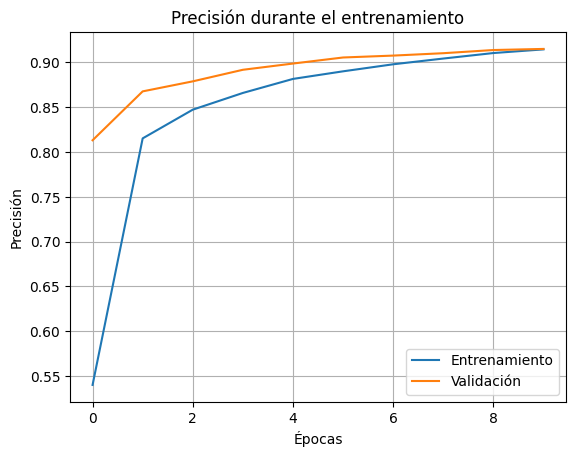

In [12]:
# 9. Gráfica de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


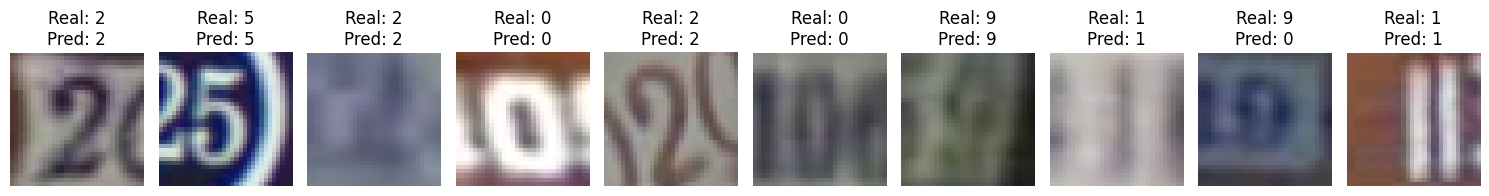

In [13]:
import random

# Seleccionar 10 muestras aleatorias del conjunto de prueba
num_samples = 10
indices = random.sample(range(len(test_images)), num_samples)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Obtener predicciones del modelo
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualización
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Real: {sample_labels[i]}\nPred: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
